<a href="https://colab.research.google.com/github/dahyun723/ESAA_1/blob/main/week5_FRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드 ch4.1~2 (181p-210p)
#분류(Classification)
지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

지도학습의 대표적인 유형 -> 분류 : 학습데이터로 주어진 데이터의 피처와 레이블값을 머신러닝알고리즘으로 학습해 모델 생성. 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블값을 예측하는 것

기존의 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것
***

*   베이즈 통계와 생성 모델에 기반한 나이브 베이즈


*   독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀

*   데이터의 균일도에 따른 규칙 기반의 결정 트리

*   개별 클레스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신

*   근접거리를 기준으로 하는 최소 근접 알고리즘

*   심층 연결 기반의 신경망

*   서로 다른 머신러닝 알고리즘을 결합한 앙상블



---







##앙상블 방법
앙상블은 분류에서 각광 받는 방법 중 하나
서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있으나 일반적으로는 배깅(Bagging)과 부스팅 (Boosting)방식으로 나뉜다

배깅 방식의 대표 -> 랜덤 포레스트(Random Forest) : 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘

하지만 근래의 앙상블 방법은 부스팅 방식으로 지속해서 발전 중

부스팅의 효시 -> 크래디언트 부스팅(Gradient Boosting) : 뛰어난 예측 성능을 가지고 있지만 , 수행 시간이 너무 오래걸림
XgBoost(extra Gradient Boost), LightGBM 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장 -> 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리매김

* 앙상블 방법의 개요
* 랜덤 포레스트
* 그래디언트 부스팅의 정통적인 앙상블 기법
* 부스팅 계열의 최신 기법인 XGBoost, LightGBM
* 앙상블의 앙상블이라 불리는 스태킹(Stacking) 기법



앙상블은 서로 다른 또는 같은 알고리즘을 결합한다고 했는데 대부분은 동일한 알고리즘을 결합합니다

앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리

##02. 결정 트리

: 매우 쉽고 유연하게 적용될 수 있는 알고리즘

**데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 반드는 것**

또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다
예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있다
하지만 이것이 오히려 앙상블기법에는 장점으로 작용

앙상블은 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상 시키는데 결정 트리가 좋은 약한 학습기가 되기 때문이다

일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/ else 기반으로 나타내는 것
쉽게 생각하면 스무고개와 유사

* 규칙 노드(Decision Node)로 표시된 노드는 규칙 조건이 되는 것
* 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값
* 서브 트리(Sub Tree) 새로운 규칙 조건마다 서브 트리가 생성

많은 규칙이 있다는 것은 분류 결정하는 방식이 더욱 복잡해진다는 것
-> 과적합으로 이어지기 쉽다

즉, 트리의 깊이가 깊어질 수록 결정 트리의 예측 성능이 저하될 가능성이 높다
가능한 적은 **결정 노드**로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해지는 것이 Best

이를 위해서는 어떻게 트리를 분할(Split)하는 지가 중요 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요



결정 노드는 정보 **균일도**가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다

이러한 정보 균일도를 측정하는 대표적인 방법은
1. 엔트로피를 이용한 정보 이득(Information Gain)지수와 (정보 이득은 엔트로피라는 개념을 기반으로 한다 엔트로피는 주어진 데이터의 집합의 혼잡도를 의미 ->서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮다 정보이득지수 : 1에서 엔트로피지수를 뺀 값  같은 값이 섞여 이있어 엔트로피지수가 낮고 정보이득이 높은 속성을 기준으로 분할한다)
2. 지니 계수가 있다 (지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수 경졔학자인 코라도지니의 이름에서 딴 계수로서 0이 가장 평등하고 1로  갈수록 불평등 머신러닝에 적용할 때는 지니 계수가 낮을 수록 데이터 균일도가 높은 것으로 해석해 지니계수가 낮은 속성을 기준으로 분할)

* 정보이득지수는 높은 것이 Good
* 지니 계수는 낮은 것이 Good



결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier 기본으로 지니 계수를 이용해서 데이터 세트를 분할

일반적인 알고리즘은 데이터셋을 분할하는데 가장 좋은 조건(즉, 정보이득이 높거나 지니계수가 낮은 조건을 찾아서) 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤

데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다

##결정트리 모델의 특징

결정 트리의 가장 큰 **장점** : 정보의 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다

결정트리의 룰이 매우 명확하고 이에 기반에 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고 시각화로 표현까지 할 수 있다

또한 정보의 균일도만 신경쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요X

결정 트리의 가장 큰 **단점** : 과적합으로 정확도가 떨어진다

피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없다

->모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 더 많다 하지만 결정 트리는 계속해서 조건을 추가 하면서 트리의 깊이가 계속 커지고 결과적으로 복잡한 학습모델에 이르게 된다

->복잡한 학습 모델은 실제 상황에 유연하게 대처할 수 없어서 예측 성능이 떨어진다

-> 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 된다

##결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTree**Classifier**(분류를 위한 클래스)와 DecisionTree**Regresso**r(회귀를 위한 클래스) 클래스를 제공한다

사이킷런 결정 트리 구현은 CART(Classification and Regression Trees) 알고리즘 기반이다

CART는 회귀와 분류 모두 가능한 트리 알고리즘이지만 여기서는 분류를 위한 DecisionTreeC**lassifier** 클래스만 다룸

분류와 회귀 모두 파라미터가 동일함
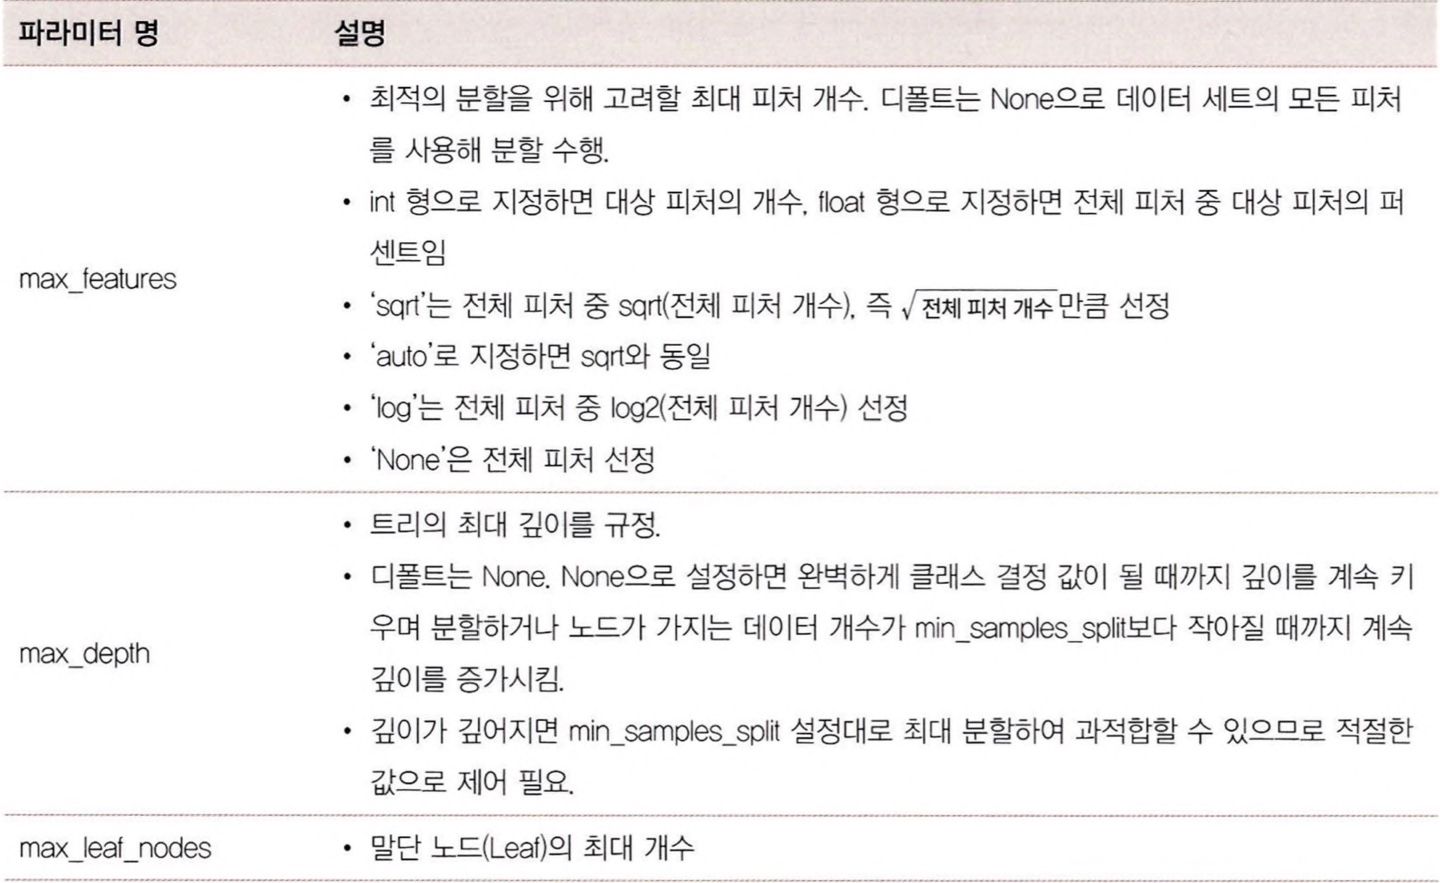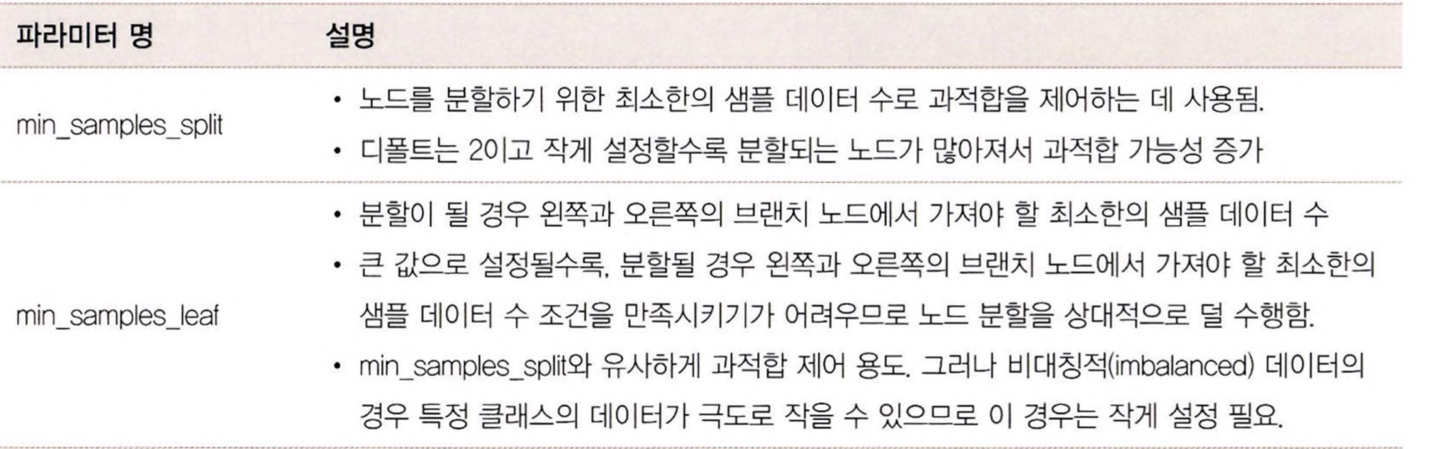



##결정 트리 모델의 시각화

결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법이 바로 Graphviz()를 사용하는 것
원래 그래프 기반의 dot파일로 기술된 다양한 이미지를 쉽게 시각화 할 수 있는 패키지
사이킷런은 이러한 Graphviz패키지와 쉽게 인터페이스 할 수 있도록 export_graphviz()를 제공한다

export_graphviz() : 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트 , 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다
이렇게 결정 트리가 만드는 규칙을 시각화해보면 결정 트리 알고리즘을 더욱 쉽게 이해할 수 있다

In [ ]:
#Graphviz를 윈도우에 설치
#Graphviz의 파이썬 래퍼 모듈를 명령어를 이용해 설치
!pip install graphviz


설치가 완료된 Graphviz를 이용해 붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifer학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

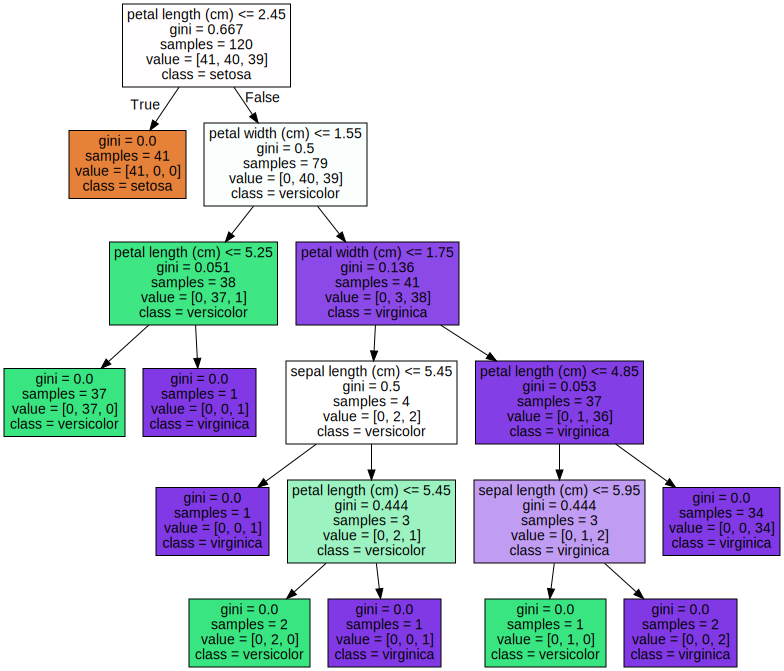

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()호출의 결과로 out_file로 지장된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,\
                feature_names=iris_data.feature_names, impurity=True, filled=True)
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

출력된 결과를 보면 각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되는지 한눈에 알 수 있게 시각화 되어 있다

이시각화된 도표를 좀 더 이용해 결정 트리 규칙이 어떻게 구성되는지 자세히 알아보자

먼저 더이상 **자식 노드가 없는 노드는 리프 노드**

리프노드는 최종 클래스(레이블)값이 결정 되는 노드

리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다

**자식 노드가 있는 노드는 브랜치 노드**이며 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있다

* petal length(cm) : 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건이다 이조건이 없으면 리프노드

* gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수이다
* samples는 현 규칙에 해당하는 데이터 건수이다
* value = [] 는 클래스 값 기반의 데이터 건수이다
붓곷 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며

0 : setosa, 1: Versicolor, 2: Virginica

만일 Value=[41,40,39]라면 클래스 값의 순서대로 setosa41개, versicolor40개, virginica 39개로 데이터가 구성되어있다는 의미


Feature importances :
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

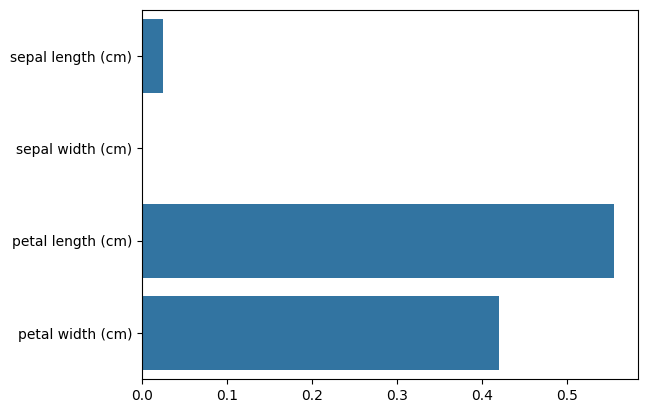

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("Feature importances :\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)


여러 피처들 중 petal length 가 가장 피처 중요도가 높음을 알 수 있다

##결정 트리 과적합(overfitting)
결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합문제를 시각화해 알아본다

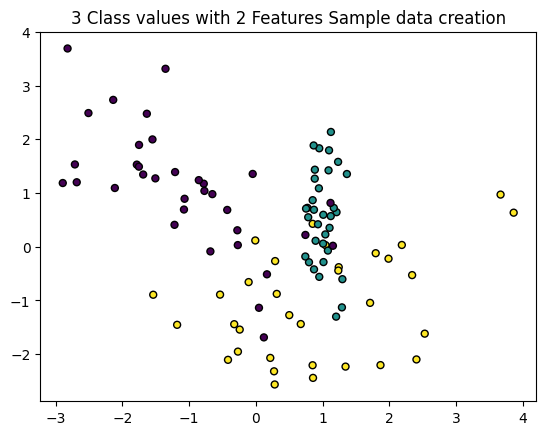

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시됨
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolors='k')


각 피처가 xy축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 돼 있음

X_features 와 y_lavels 데이터 세트를 기반으로 결정 트리를 학습할 예정


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
#visualize_boundary가 정의되지 않아서 나타나는 오류
#유틸리티함수로, 부록에만 기재되어있다고 함

NameError: name 'visualize_boundary' is not defined

##결정 트리 실습 - 사용자 행동 인식 데이터 세트

이번에는 결정 트리를 이용해 UCI 머신러닝 리포지토리에서 제공하는 사용자 행동 인식 데이터 세트에 대한 예측 분류를 시행해 보겠습니다. 해당 데이터는 30명에서 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러가지 피처를 수집한 데이터이다
수집된 피처 세트를 기반으로결정트리를 이용해 어떤 동작인지 예측해본다

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving features.txt to features.txt


In [3]:

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])


#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개마나 추출
feature_name= feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [4]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [5]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df



In [7]:
from google.colab import files
uploaded = files.upload()

Saving X_train.txt to X_train.txt
Saving y_train.txt to y_train.txt


In [9]:
from google.colab import files
uploaded = files.upload()

Saving X_test.txt to X_test.txt
Saving y_test.txt to y_test.txt


In [10]:
from re import X
import pandas as pd

def get_human_dataset():
  feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  new_feature_name_df = get_new_feature_name_df(feature_name_df)
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()
  X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
  y_train = pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-5-66f21cdf8053>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)


In [ ]:
#로드한 학습용 피처 데이터 세트를 간략히 살펴보자
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

In [11]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


약 85.48%의 정확도를 나타내고 있다
이번에는 결정 트리 깊이가 예측 정확도에 주는 영향을 살펴보겠다
결정 트리의 경우 분류를 위해 리프노드가 될 수 있는 적합한 수준이 될 때까지 지속해서 트리의 분할을 수정해가면서 깊이가 깊어진다

In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV 최고 평균 정확도 수치 : 0.8513
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 16}


In [16]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [17]:
max_depths = [ 6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


max_depth가 8일 경우 약 87.17%로 가장 높은 정확도를 나타냈다
그리고 8을 분기점으로 정확도가 계속 감소한다

앞의 GridsearchCV 예제와 마찬가지로 깊이가 깊어질수록 테스트 데이터 정확도는 더 떨어진다
이처럼 결정 트리는 깊이가 깊어질수록 과적합의 영향력이 커지므로 하이퍼 파라미터를 이용해 깊이를 제어할 수 있어야한다

복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수 있다

In [18]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 파이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 파이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


<function matplotlib.pyplot.show(close=None, block=None)>

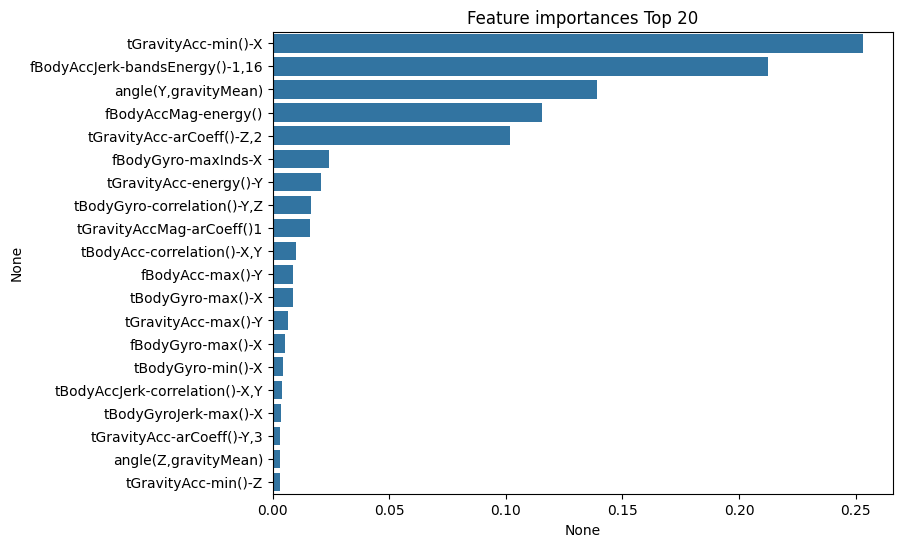

In [22]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
#Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
#중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show

막대 그래프상에서 확인해보면 이중 가장 높은 중요도를 가진 5개의 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있는 것을 알 수 있다